### Exploratory Data Analisys

In [1]:
cd ../

c:\Users\eduar\Documents\usp\AMST\ml_timeseries_usp


In [2]:
from utils import (
    read_all_csv_files,
    correcting_dtypes,
    stocks_removing_negatives,
    plot_time_series_by_products,
    remove_materials_no_sales,
    plot_products_materials,
    plot_produtos_in_cds,
    plot_time_series_cds_products_by_stores,
    plot_time_series_cds_products_by_store_size,
    plot_time_series_cds_products_by_store_weather,
    plot_time_series_cds_products_by_store_profile,
    plot_time_series_cds_products_store_region,
    violin_plot_material_store_sales,
    hierarchical_aggregation,
    remove_time_series_min_length,
    )
import pandas as pd
import seaborn as sns
from statsforecast import StatsForecast
from statsforecast.models import MSTL
from statsmodels.graphics.tsaplots import plot_acf


c:\Users\eduar\AppData\Local\anaconda3\envs\or-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)

#### 1. Extract data

In [90]:
df = read_all_csv_files()

#### 2. Basic dataframe infos

In [91]:
df.shape

(979485, 35)

The shape shows basic infomation related to the size of dataframe. Witch is raltive big, but not too much

In [92]:
df.head(5)

mes                          material  \
0  2023-02-01  045d7d474e1255fba6a784818a34f3fa   
0  2023-08-01  5cf422a5550730fb73deb1c1b8b07e4f   
1  2023-08-01  5cf422a5550730fb73deb1c1b8b07e4f   
1  2023-02-01  045d7d474e1255fba6a784818a34f3fa   
2  2023-08-01  5cf422a5550730fb73deb1c1b8b07e4f   

                                sku  produto     cor tamanho  ordem_tamanho  \
0  13bac94c7ada49b30f8d61924a768de4  x blusa  branco       p              2   
0  9882544ee33a5526755c5932737e4df7  x blusa  branco       g              4   
1  9882544ee33a5526755c5932737e4df7  x blusa  branco       g              4   
1  13bac94c7ada49b30f8d61924a768de4  x blusa  branco       p              2   
2  9882544ee33a5526755c5932737e4df7  x blusa  branco       g              4   

  construcao padronagem  marca    decote    detalhe  \
0   circular       liso      9  decote u  sem manga   
0      malha       liso      9  decote u  sem manga   
1      malha       liso      9  decote u  sem manga   
1   circular       liso      9  decote u  sem manga   
2      malha       liso      9  decote u  sem manga   

                                   loja centro_distribuicao  idade_loja  \
0  02568ece-15d4-40d5-b05a-47069ea100e2                 CD2        26.0   
0  02568ece-15d4-40d5-b05a-47069ea100e2                 CD2        26.0   
1  126bc1f6-f329-48ba-8b94-40aed7f58c45                 CD2         6.0   
1  5f617d6a-efeb-4a43-89de-4515564aceed                 CD2        11.0   
2  1492be88-5ceb-49c6-98ff-ef90dae05875                 CD2        14.0   

  uf_loja     cidade_loja regiao_loja    bairro_loja  clima_loja  perfil_loja  \
0      SP       SAO PAULO     SUDESTE      APARECIDA           2            3   
0      SP       SAO PAULO     SUDESTE      APARECIDA           2            3   
1      SP       SAO PAULO     SUDESTE         CENTRO           1            1   
1      SP       SAO PAULO     SUDESTE      VILA REAL           1            2   
2      ES  ESPIRITO SANTO     SUDESTE  EURICO SALLES           3            2   

   porte_loja  estoque_unidades_inicio  estoque_unidades_fim  \
0           4                      0.0                   0.0   
0           4                      0.0                   0.0   
1           1                      0.0                   0.0   
1           1                      0.0                   0.0   
2           1                      0.0                   0.0   

   estoque_unidades  estoque_unidades_mediana  prop_dias_com_estoque  \
0               0.0                       0.0                    0.0   
0               0.0                       0.0                    0.0   
1               0.0                       0.0                    0.0   
1               0.0                       0.0                    0.0   
2               0.0                       0.0                    0.0   

   venda_unidades  venda_valor_total  preco_medio_unitario  \
0             0.0                0.0                   NaN   
0             0.0                0.0                   NaN   
1             0.0                0.0                   NaN   
1             0.0                0.0                   NaN   
2             0.0                0.0                   NaN   

   preco_unitario_min  preco_unitario_max  variabilidade_preco_unitario  \
0                 NaN                 NaN                           NaN   
0                 NaN                 NaN                           NaN   
1                 NaN                 NaN                           NaN   
1                 NaN                 NaN                           NaN   
2                 NaN                 NaN                           NaN   

   prop_dias_com_venda  total_observacoes_vendas  
0                  0.0                         0  
0                  0.0                         0  
1                  0.0                         0  
1                  0.0                         0  
2                  0.0                         0

In [93]:
df.tail(5)

mes                          material  \
152813  2024-11-01  2bd2f8c04c83bfcdeb2b58fac0c33212   
152814  2024-11-01  2bd2f8c04c83bfcdeb2b58fac0c33212   
152815  2024-11-01  2bd2f8c04c83bfcdeb2b58fac0c33212   
152816  2024-11-01  2bd2f8c04c83bfcdeb2b58fac0c33212   
152817  2024-11-01  2bd2f8c04c83bfcdeb2b58fac0c33212   

                                     sku produto     cor tamanho  \
152813  0c57d0c28002f1493e44d35c6be0f12a   blusa  branco       p   
152814  0c57d0c28002f1493e44d35c6be0f12a   blusa  branco       p   
152815  0c57d0c28002f1493e44d35c6be0f12a   blusa  branco       p   
152816  0c57d0c28002f1493e44d35c6be0f12a   blusa  branco       p   
152817  0c57d0c28002f1493e44d35c6be0f12a   blusa  branco       p   

        ordem_tamanho construcao padronagem  marca      decote    detalhe  \
152813              2      malha       liso      9        reto  sem manga   
152814              2   circular       liso      9        reto  sem manga   
152815              2      malha       liso      9        reto  sem manga   
152816              2   circular       liso      9        reto  sem manga   
152817              2      malha       liso      9  sem decote  sem manga   

                                        loja centro_distribuicao  idade_loja  \
152813  fdf39bea-2605-4363-848b-eabff9be6133                 CD2        14.0   
152814  fdf39bea-2605-4363-848b-eabff9be6133                 CD2        14.0   
152815  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147                 CD1        28.0   
152816  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147                 CD1        28.0   
152817  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147                 CD1        28.0   

       uf_loja cidade_loja regiao_loja bairro_loja  clima_loja  perfil_loja  \
152813      SP   SAO PAULO     SUDESTE    CERAMICA           1            3   
152814      SP   SAO PAULO     SUDESTE    CERAMICA           1            3   
152815      PB     PARAIBA    NORDESTE     MANAIRA           3            3   
152816      PB     PARAIBA    NORDESTE     MANAIRA           3            3   
152817      PB     PARAIBA    NORDESTE     MANAIRA           3            3   

        porte_loja  estoque_unidades_inicio  estoque_unidades_fim  \
152813           3                      0.0                   0.0   
152814           3                      8.0                   5.0   
152815           4                      5.0                   3.0   
152816           4                      5.0                  17.0   
152817           4                      0.0                   0.0   

        estoque_unidades  estoque_unidades_mediana  prop_dias_com_estoque  \
152813          0.000000                       0.0                    0.0   
152814          7.400000                       8.0                    1.0   
152815          3.933333                       4.0                    1.0   
152816          6.366667                       5.0                    1.0   
152817          0.000000                       0.0                    0.0   

        venda_unidades  venda_valor_total  preco_medio_unitario  \
152813             0.0                0.0                   NaN   
152814             4.0              159.6                  39.9   
152815             2.0               79.8                  39.9   
152816             3.0              119.7                  39.9   
152817             0.0                0.0                   NaN   

        preco_unitario_min  preco_unitario_max  variabilidade_preco_unitario  \
152813                 NaN                 NaN                           NaN   
152814                39.9                39.9                           0.0   
152815                39.9                39.9                           0.0   
152816                39.9                39.9                           0.0   
152817                 NaN                 NaN                           NaN   

        prop_dias_com_venda  total_observacoes_vendas  
152813             0.000000     

#### Correctring datatypes


In [94]:
df = correcting_dtypes(df)

In [95]:
df.dtypes

mes                             datetime64[ns]
material                                object
sku                                     object
produto                                 object
cor                                     object
tamanho                                 object
ordem_tamanho                            int64
construcao                              object
padronagem                              object
marca                                   object
decote                                  object
detalhe                                 object
loja                                    object
centro_distribuicao                     object
idade_loja                               int64
uf_loja                                 object
cidade_loja                             object
regiao_loja                             object
bairro_loja                             object
clima_loja                              object
perfil_loja                             object
porte_loja   

First view shows key information about date, material,stores and sku. There are a lot of columns with information about product, stocks sales. And there are missing values related to price.

#### 4. Basic stats

In [96]:
df.describe()

mes  ordem_tamanho     idade_loja  \
count                         979485  979485.000000  979485.000000   
mean   2024-04-22 04:11:25.080016640       3.203220      16.572751   
min              2023-02-01 00:00:00       1.000000       0.000000   
25%              2023-09-01 00:00:00       2.000000      11.000000   
50%              2024-05-01 00:00:00       3.000000      13.000000   
75%              2024-12-01 00:00:00       4.000000      19.000000   
max              2025-07-01 00:00:00       9.000000      54.000000   
std                              NaN       1.716345      10.440480   

       estoque_unidades_inicio  estoque_unidades_fim  estoque_unidades  \
count            979485.000000         979485.000000     979485.000000   
mean                  0.932905              0.935735          0.927376   
min                 -13.000000            -13.000000        -10.354839   
25%                   0.000000              0.000000          0.000000   
50%                   0.000000              0.000000          0.000000   
75%                   1.000000              1.000000          1.100000   
max                  69.000000             69.000000         59.548387   
std                   2.005210              2.001553          1.869009   

       estoque_unidades_mediana  prop_dias_com_estoque  venda_unidades  \
count             979485.000000          979485.000000   979485.000000   
mean                   0.915708               0.316369        0.882000   
min                  -13.000000               0.000000        0.000000   
25%                    0.000000               0.000000        0.000000   
50%                    0.000000               0.000000        0.000000   
75%                    1.000000               0.925926        1.000000   
max                   61.000000               1.000000       66.000000   
std                    1.916312               0.439082        2.250869   

       venda_valor_total  preco_medio_unitario  preco_unitario_min  \
count      979485.000000         259847.000000       259847.000000   
mean           42.093815             53.259734           51.509032   
min             0.000000              0.000000            0.000000   
25%             0.000000             29.900000           29.900000   
50%             0.000000             39.900000           39.900000   
75%            29.900000             49.900000           49.900000   
max          4493.770000            179.900000          179.900000   
std           111.835862             37.855781           37.840019   

       preco_unitario_max  variabilidade_preco_unitario  prop_dias_com_venda  \
count       259847.000000                 165978.000000        979485.000000   
mean            54.238507                      2.208921             0.025871   
min              0.000000                      0.000000             0.000000   
25%             29.990000                      0.000000             0.000000   
50%             39.900000                      0.000000             0.000000   
75%             49.900000                      2.954977             0.032258   
max            179.900000                     98.924239             1.000000   
std             38.171466                      4.179983             0.060401   

       total_observacoes_vendas  
count             979485.000000  
mean                   0.798609  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                   27.000000  
std                    1.866721

The cutoff dates goes from "2023-02-01" to "2025-07-01" (2 and half years). The size columns are centrered in 3 and maximum on 9 witch makes sense for most part of clothes has a standard display ("pp","p","m","g","gg"), in terms of size order should be (1,2,3,4,5) centring in number 3 as a medium size, but exists higher and lower displays pushing the max value to 9. 

In [97]:
df['produto'].unique()

array(['x blusa', 'calca', 'camiseta', 'blusa'], dtype=object)

As commented before, blusa and camiseta has the standard display sizes, but calca has higer display sizes.

the age of the stores looks normal, the higher value is less than enterprise foundation and has stores oppened this year witch makes sense be 0. 

However stocks values has negative integers that need to be transformed to 0. One important aspect of stock's data is a half part of observations are 0, and a quarter of it is 1. So the max value of 69 can be a outlier, and the volumety  of data probably is sku in stores per day.

Sales records distribution is very similar and should be analyse in outlier remove approach.

The prices records are the most problem feature, because there are a lot of missing values ~75%. Probably the best way to deal with it is drop and exctract average values from sales.

#### 5. cleanning

In [98]:
df = stocks_removing_negatives(df)

#### 6. Handling nulls

In [99]:
(df.isnull().sum() / len(df)) * 100

mes                              0.000000
material                         0.000000
sku                              0.000000
produto                          0.000000
cor                              0.000000
tamanho                          0.000000
ordem_tamanho                    0.000000
construcao                       0.000000
padronagem                       0.000000
marca                            0.000000
decote                          25.367515
detalhe                          0.000000
loja                             0.000000
centro_distribuicao              0.000000
idade_loja                       0.000000
uf_loja                          0.000000
cidade_loja                      0.000000
regiao_loja                      0.000000
bairro_loja                      0.000000
clima_loja                       0.000000
perfil_loja                      0.000000
porte_loja                       0.000000
estoque_unidades_inicio          0.000000
estoque_unidades_fim             0

In [100]:
def droping_and_replace_prices(df):
    df = df.drop(['preco_medio_unitario','preco_unitario_min','preco_unitario_max','variabilidade_preco_unitario'],axis=1)
    df['preco_unitario'] = df['venda_valor_total']/df['venda_unidades']
    return df

In [112]:
df = droping_and_replace_prices(df)

In [113]:
df['preco_unitario'].isnull().sum()

np.int64(719638)

In [114]:
def fillna_hierarchical(df, target_col, hierarchy_levels, agg_func='median'):
    """
    Preenche NaN de forma hierárquica, do mais específico ao mais geral.
    
    Parâmetros:
    - df: DataFrame
    - target_col: coluna com NaN (ex: 'preco_unitario')
    - hierarchy_levels: lista de listas com níveis (do mais específico ao geral)
    - agg_func: 'median', 'mean', 'max', etc.
    """
    df = df.copy()
    col = df[target_col]
    
    for level in hierarchy_levels:
        print(f"Preenchendo com: {level} → {agg_func}")
        filled = df.groupby(level)[target_col].transform(agg_func)
        col = col.fillna(filled)
    
    # Último fallback: mediana global
    if col.isnull().any():
        global_value = df[target_col].agg(agg_func)
        print(f"Preenchendo global com {agg_func}: {global_value}")
        col = col.fillna(global_value)
    
    df[target_col] = col
    return df

# === USO ===
hierarchy = [
    ['material', 'loja', 'mes'],     # mais específico
    ['produto', 'loja', 'mes'],
    ['material', 'mes'],
    ['produto', 'mes'],
    ['material'],
    ['produto']
]

df = fillna_hierarchical(df, 'preco_unitario', hierarchy, agg_func='median')

Preenchendo com: ['material', 'loja', 'mes'] → median
Preenchendo com: ['produto', 'loja', 'mes'] → median
Preenchendo com: ['material', 'mes'] → median
Preenchendo com: ['produto', 'mes'] → median
Preenchendo com: ['material'] → median
Preenchendo com: ['produto'] → median
Preenchendo global com median: 39.9


In [115]:
df.isnull().sum()

mes                         0
material                    0
sku                         0
produto                     0
cor                         0
tamanho                     0
ordem_tamanho               0
construcao                  0
padronagem                  0
marca                       0
decote                      0
detalhe                     0
loja                        0
centro_distribuicao         0
idade_loja                  0
uf_loja                     0
cidade_loja                 0
regiao_loja                 0
bairro_loja                 0
clima_loja                  0
perfil_loja                 0
porte_loja                  0
estoque_unidades_inicio     0
estoque_unidades_fim        0
estoque_unidades            0
estoque_unidades_mediana    0
prop_dias_com_estoque       0
venda_unidades              0
venda_valor_total           0
prop_dias_com_venda         0
total_observacoes_vendas    0
preco_unitario              0
dtype: int64

In [65]:
df['decote'].unique()

array(['decote u', 'sem decote', nan, 'decote v', 'redondo', 'quadrado',
       'reto', 'canoa'], dtype=object)

In [108]:
def ajustar_decotes(df):
    df['decote'] = df['decote'].replace({
    'decote u': 'u',
    'decote v': 'v'
})

# Preenche NaN com 'sem decote'
    df['decote'] = df['decote'].fillna('sem decote')
    return df

In [ ]:
df = ajustar_decotes(df)

mes                                  0
material                             0
sku                                  0
produto                              0
cor                                  0
tamanho                              0
ordem_tamanho                        0
construcao                           0
padronagem                           0
marca                                0
decote                               0
detalhe                              0
loja                                 0
centro_distribuicao                  0
idade_loja                           0
uf_loja                              0
cidade_loja                          0
regiao_loja                          0
bairro_loja                          0
clima_loja                           0
perfil_loja                          0
porte_loja                           0
estoque_unidades_inicio              0
estoque_unidades_fim                 0
estoque_unidades                     0
estoque_unidades_mediana 

### 6. check_keys

In [116]:
df.groupby(['sku','loja','mes']).count()

material  \
sku                              loja                                 mes                    
013b91d62d311c03b38be2149d7f096f 00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-02-01         3   
                                                                      2023-03-01         3   
                                                                      2023-04-01         3   
                                                                      2023-05-01         3   
                                                                      2023-06-01         3   
...                                                                                    ...   
ffaad1143a63d61ae016bf025498a2e8 fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-08-01         2   
                                                                      2023-09-01         2   
                                                                      2023-10-01         2   
                                                                      2023-11-01         2   
                                                                      2023-12-01         2   

                                                                                  produto  \
sku                              loja                                 mes                   
013b91d62d311c03b38be2149d7f096f 00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-02-01        3   
                                                                      2023-03-01        3   
                                                                      2023-04-01        3   
                                                                      2023-05-01        3   
                                                                      2023-06-01        3   
...                                                                                   ...   
ffaad1143a63d61ae016bf025498a2e8 fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-08-01        2   
                                                                      2023-09-01        2   
                                                                      2023-10-01        2   
                                                                      2023-11-01        2   
                                                                      2023-12-01        2   

                                                                                  cor  \
sku                              loja                                 mes               
013b91d62d311c03b38be2149d7f096f 00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-02-01    3   
                                                                      2023-03-01    3   
                                                                      2023-04-01    3   
                                                                      2023-05-01    3   
                                                                      2023-06-01    3   
...                                                                               ...   
ffaad1143a63d61ae016bf025498a2e8 fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-08-01    2   
                                                                      2023-09-01    2   
                                                                      2023-10-01    2   
                                                                      2023-11-01    2   
                                                                      2023-12-01    2   

                                                                                  tamanho  \
sku                              loja                                 mes                   
013b91d62d311c03b38be2149d7f096f 00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-02-01        3   
                                                                      2023-03-01        3   
                                                                      2023-04-01        3   
                          

In [117]:
df[(df['sku']=='013b91d62d311c03b38be2149d7f096f') & (df['loja']=='00703d74-ba0a-4dbf-81a1-605aff02efd7') & (df['mes']=='2023-02-01')]

mes                          material  \
0 2023-02-01  3a5e87c5f227c2224fc7f24787d40b95   
1 2023-02-01  3a5e87c5f227c2224fc7f24787d40b95   
2 2023-02-01  3a5e87c5f227c2224fc7f24787d40b95   

                                sku produto    cor tamanho  ordem_tamanho  \
0  013b91d62d311c03b38be2149d7f096f   calca  preto       g              4   
1  013b91d62d311c03b38be2149d7f096f   calca  preto       g              4   
2  013b91d62d311c03b38be2149d7f096f   calca  preto       g              4   

     construcao padronagem marca      decote detalhe  \
0  tecido plano       liso     9  sem decote   longo   
1  tecido plano       liso     9  sem decote   longo   
2  tecido plano       liso     9  sem decote   longo   

                                   loja centro_distribuicao  idade_loja  \
0  00703d74-ba0a-4dbf-81a1-605aff02efd7                 CD1          14   
1  00703d74-ba0a-4dbf-81a1-605aff02efd7                 CD1          14   
2  00703d74-ba0a-4dbf-81a1-605aff02efd7                 CD1          14   

  uf_loja cidade_loja regiao_loja  bairro_loja clima_loja perfil_loja  \
0      BA       BAHIA    NORDESTE  GOES CALMON          3           2   
1      BA       BAHIA    NORDESTE  GOES CALMON          3           2   
2      BA       BAHIA    NORDESTE  GOES CALMON          3           2   

  porte_loja  estoque_unidades_inicio  estoque_unidades_fim  estoque_unidades  \
0          1                      0.0                   0.0          0.000000   
1          1                      0.0                   2.0          0.285714   
2          1                      0.0                   0.0          0.000000   

   estoque_unidades_mediana  prop_dias_com_estoque  venda_unidades  \
0                       0.0               0.000000             0.0   
1                       0.0               0.142857             0.0   
2                       0.0               0.000000             0.0   

   venda_valor_total  prop_dias_com_venda  total_observacoes_vendas  \
0                0.0                  0.0                         0   
1                0.0                  0.0                         0   
2                0.0                  0.0                         0   

   preco_unitario  
0           159.9  
1           159.9  
2           159.9

#### Ajuste da volumetria dos dados, provavelmente uma join errado promovendo duplicação do mesmo

In [118]:
df_estoque = df.groupby(['sku','loja','mes']).agg({'estoque_unidades_inicio':'sum',
                                    'estoque_unidades_fim':'sum',
                                    'estoque_unidades':'sum',
                                    'estoque_unidades_mediana':'sum',
                                    'prop_dias_com_estoque':'sum'}).reset_index()
df_estoque

sku  \
0       013b91d62d311c03b38be2149d7f096f   
1       013b91d62d311c03b38be2149d7f096f   
2       013b91d62d311c03b38be2149d7f096f   
3       013b91d62d311c03b38be2149d7f096f   
4       013b91d62d311c03b38be2149d7f096f   
...                                  ...   
443401  ffaad1143a63d61ae016bf025498a2e8   
443402  ffaad1143a63d61ae016bf025498a2e8   
443403  ffaad1143a63d61ae016bf025498a2e8   
443404  ffaad1143a63d61ae016bf025498a2e8   
443405  ffaad1143a63d61ae016bf025498a2e8   

                                        loja        mes  \
0       00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-02-01   
1       00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-03-01   
2       00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-04-01   
3       00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-05-01   
4       00703d74-ba0a-4dbf-81a1-605aff02efd7 2023-06-01   
...                                      ...        ...   
443401  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-08-01   
443402  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-09-01   
443403  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-10-01   
443404  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-11-01   
443405  fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147 2023-12-01   

        estoque_unidades_inicio  estoque_unidades_fim  estoque_unidades  \
0                           0.0                   2.0          0.285714   
1                           2.0                   1.0          1.935484   
2                           1.0                   1.0          1.000000   
3                           1.0                   1.0          1.000000   
4                           1.0                   1.0          1.000000   
...                         ...                   ...               ...   
443401                      0.0                   0.0          0.000000   
443402                      0.0                   0.0          0.000000   
443403                      0.0                   0.0          0.000000   
443404                      0.0                   0.0          0.000000   
443405                      0.0                   0.0          0.000000   

        estoque_unidades_mediana  prop_dias_com_estoque  
0                            0.0               0.142857  
1                            2.0               1.000000  
2                            1.0               1.000000  
3                            1.0               1.000000  
4                            1.0               1.000000  
...                          ...                    ...  
443401                       0.0               0.000000  
443402                       0.0               0.000000  
443403                       0.0               0.000000  
443404                       0.0               0.000000  
443405                       0.0               0.000000  

[443406 rows x 8 columns]

In [119]:
df_ = df.drop(['estoque_unidades_inicio',
         'estoque_unidades_fim',
         'estoque_unidades',
         'estoque_unidades_mediana',
         'prop_dias_com_estoque'],axis=1
         ).fillna('missing').groupby(['sku','loja','mes']
         ).max()

In [123]:
df_.reset_index().describe()

mes  ordem_tamanho     idade_loja  \
count                         443406  443406.000000  443406.000000   
mean   2024-02-15 01:05:33.153814016       3.372943      16.585035   
min              2023-02-01 00:00:00       1.000000       0.000000   
25%              2023-07-01 00:00:00       2.000000      11.000000   
50%              2023-12-01 00:00:00       3.000000      13.000000   
75%              2024-10-01 00:00:00       5.000000      19.000000   
max              2025-07-01 00:00:00       9.000000      54.000000   
std                              NaN       1.928920      10.473518   

       venda_unidades  venda_valor_total  prop_dias_com_venda  \
count   443406.000000      443406.000000        443406.000000   
mean         1.801063          86.020664             0.052471   
min          0.000000           0.000000             0.000000   
25%          0.000000           0.000000             0.000000   
50%          0.000000           0.000000             0.000000   
75%          2.000000         119.700000             0.068966   
max         66.000000        4493.770000             1.000000   
std          3.043757         152.150161             0.080092   

       total_observacoes_vendas  preco_unitario  
count             443406.000000   443406.000000  
mean                   1.623196       72.562600  
min                    0.000000        0.000000  
25%                    0.000000       38.527500  
50%                    1.000000       47.775786  
75%                    2.000000      129.900000  
max                   27.000000      179.900000  
std                    2.479709       51.366309

In [ ]:
def remover_dados_duplicados_estoque(df):
    df_estoque = df.groupby(['sku','loja','mes']).agg({'estoque_unidades_inicio':'sum',
                                    'estoque_unidades_fim':'sum',
                                    'estoque_unidades':'sum',
                                    'estoque_unidades_mediana':'sum',
                                    'prop_dias_com_estoque':'sum'}).reset_index()

    df_sem_estoque = df.drop(['estoque_unidades_inicio',
         'estoque_unidades_fim',
         'estoque_unidades',
         'estoque_unidades_mediana',
         'prop_dias_com_estoque'],axis=1
         ).fillna('missing').groupby(['sku','loja','mes']
         ).max()
         
    df = df_sem_estoque.merge(df_estoque,on=['sku','loja','mes'],how='inner')
    return df

In [125]:
df = remover_dados_duplicados_estoque(df)

In [126]:
df.reset_index().describe()

index                            mes  ordem_tamanho  \
count  443406.000000                         443406  443406.000000   
mean   221702.500000  2024-02-15 01:05:33.153814016       3.372943   
min         0.000000            2023-02-01 00:00:00       1.000000   
25%    110851.250000            2023-07-01 00:00:00       2.000000   
50%    221702.500000            2023-12-01 00:00:00       3.000000   
75%    332553.750000            2024-10-01 00:00:00       5.000000   
max    443405.000000            2025-07-01 00:00:00       9.000000   
std    128000.431068                            NaN       1.928920   

          idade_loja  venda_unidades  venda_valor_total  prop_dias_com_venda  \
count  443406.000000   443406.000000      443406.000000        443406.000000   
mean       16.585035        1.801063          86.020664             0.052471   
min         0.000000        0.000000           0.000000             0.000000   
25%        11.000000        0.000000           0.000000             0.000000   
50%        13.000000        0.000000           0.000000             0.000000   
75%        19.000000        2.000000         119.700000             0.068966   
max        54.000000       66.000000        4493.770000             1.000000   
std        10.473518        3.043757         152.150161             0.080092   

       total_observacoes_vendas  preco_unitario  estoque_unidades_inicio  \
count             443406.000000   443406.000000            443406.000000   
mean                   1.623196       72.562600                 2.086048   
min                    0.000000        0.000000                 0.000000   
25%                    0.000000       38.527500                 0.000000   
50%                    1.000000       47.775786                 1.000000   
75%                    2.000000      129.900000                 3.000000   
max                   27.000000      179.900000                69.000000   
std                    2.479709       51.366309                 2.746994   

       estoque_unidades_fim  estoque_unidades  estoque_unidades_mediana  \
count         443406.000000     443406.000000             443406.000000   
mean               2.091018          2.070084                  2.046190   
min                0.000000          0.000000                  0.000000   
25%                0.000000          0.000000                  0.000000   
50%                1.000000          1.344828                  1.000000   
75%                3.000000          3.322581                  3.000000   
max               69.000000         59.548387                 61.000000   
std                2.740270          2.565496                  2.635895   

       prop_dias_com_estoque  
count          443406.000000  
mean                0.698860  
min                 0.000000  
25%                 0.000000  
50%                 0.921303  
75%                 1.000000  
max                 3.777778  
std                 0.650530

#### TimeSeries Data Analysis

Top Down

Produtos/familia

In [127]:
int(df['produto'].isnull().sum())

0

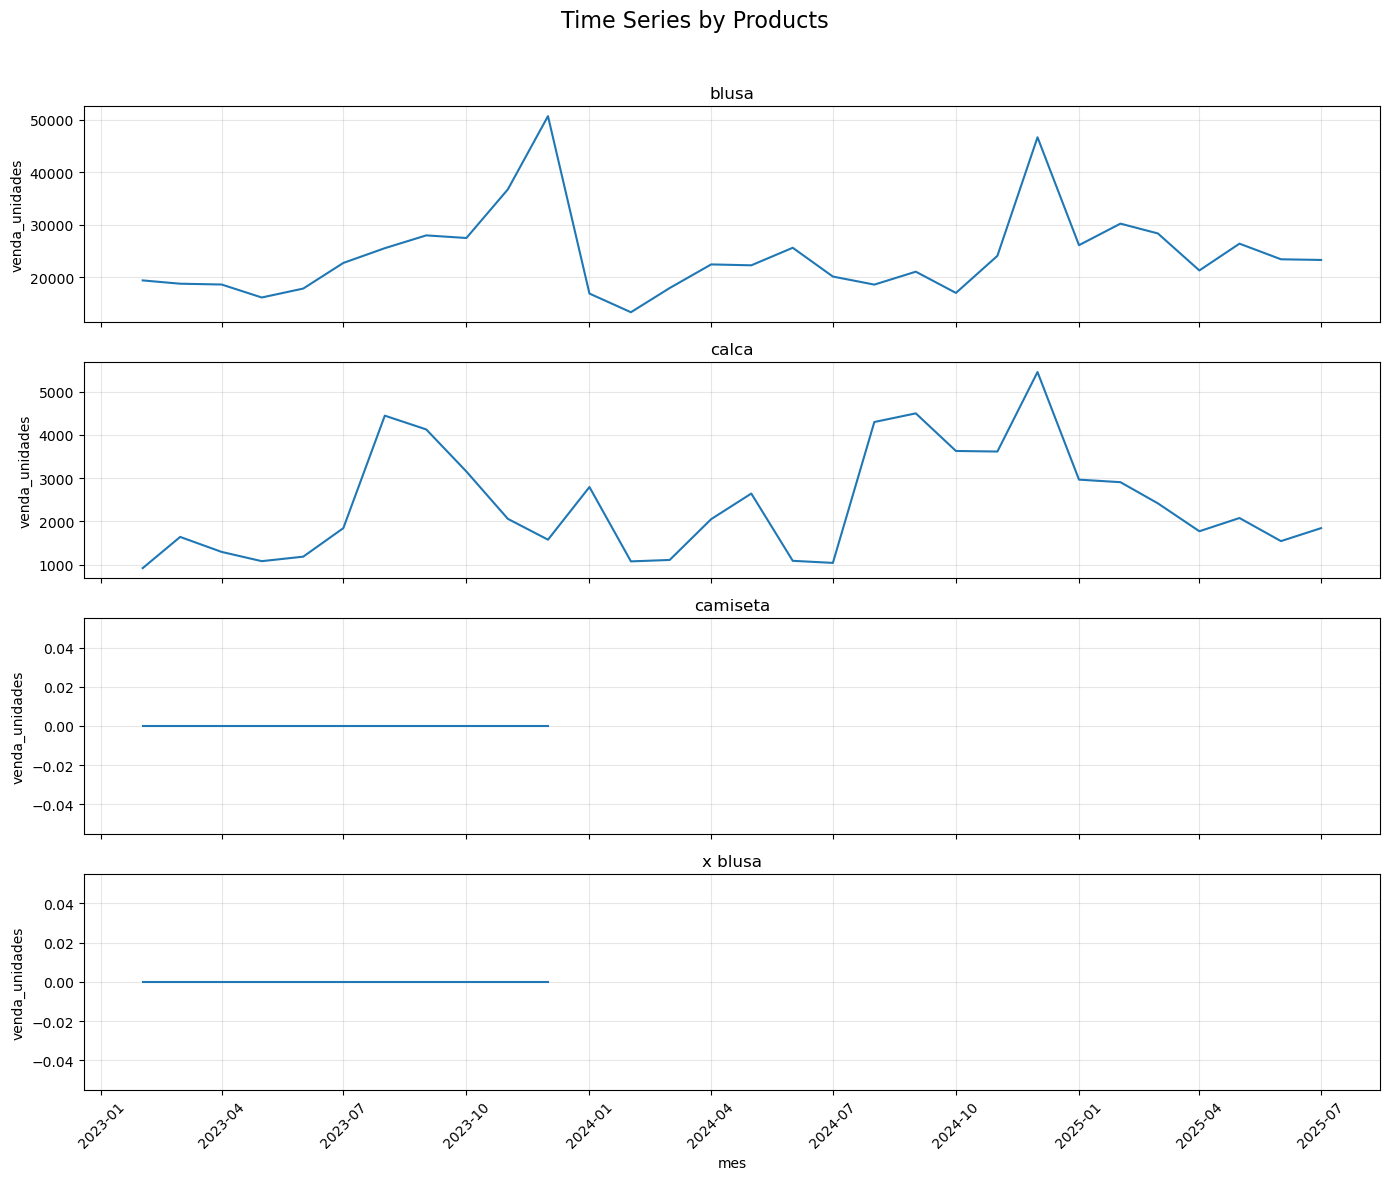

(<Figure size 1400x1200 with 4 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'camiseta'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'x blusa'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [128]:
plot_time_series_by_products(df)

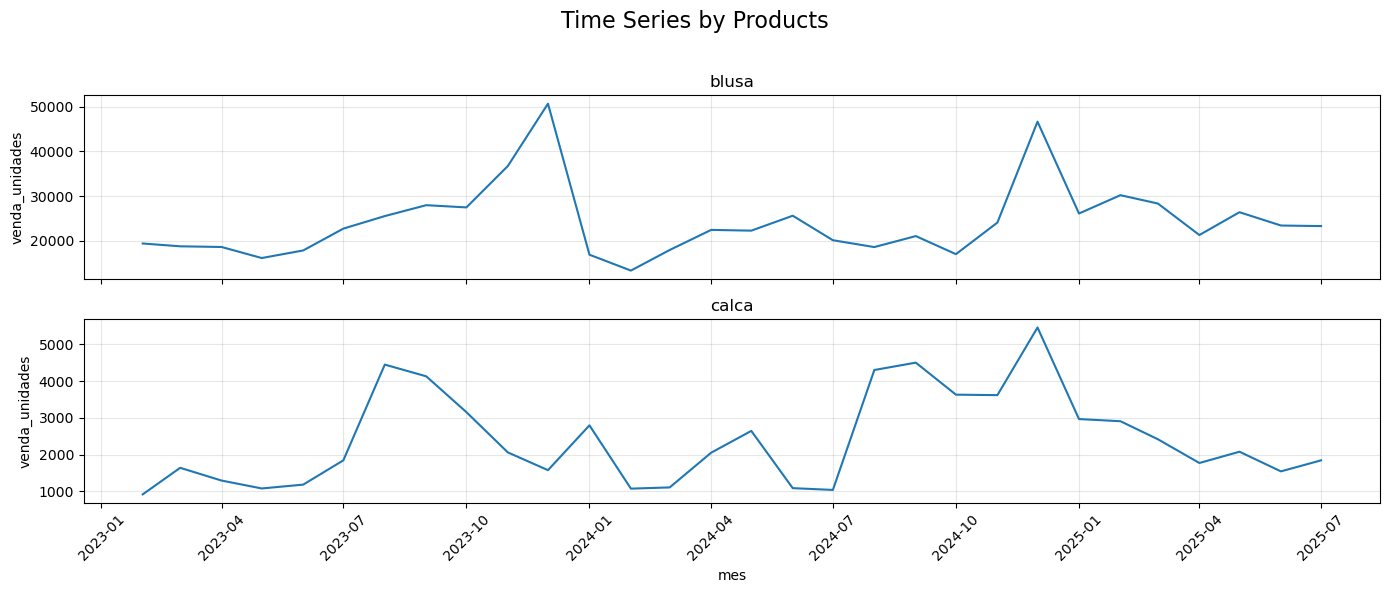

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [129]:
df = df[(df['produto']!='x blusa') & (df['produto']!='camiseta')]
plot_time_series_by_products(df)

#### material/produto

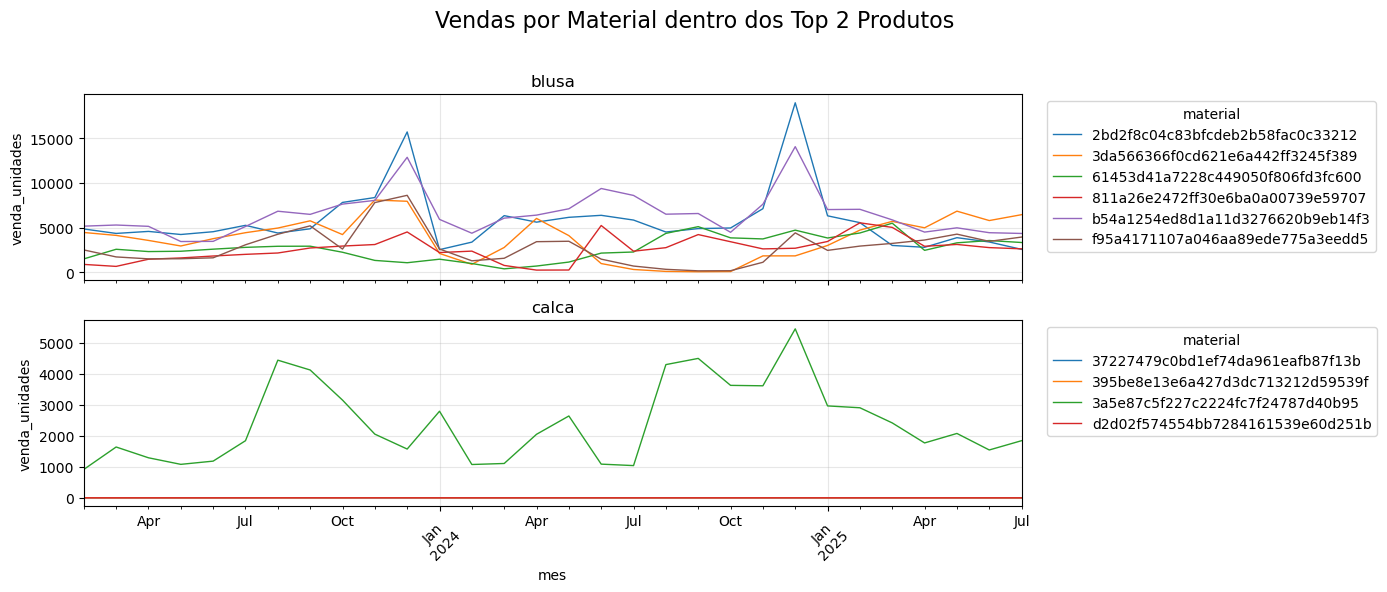

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [130]:
plot_products_materials(df, n_products=2, title='Vendas por Material dentro dos Top 2 Produtos')

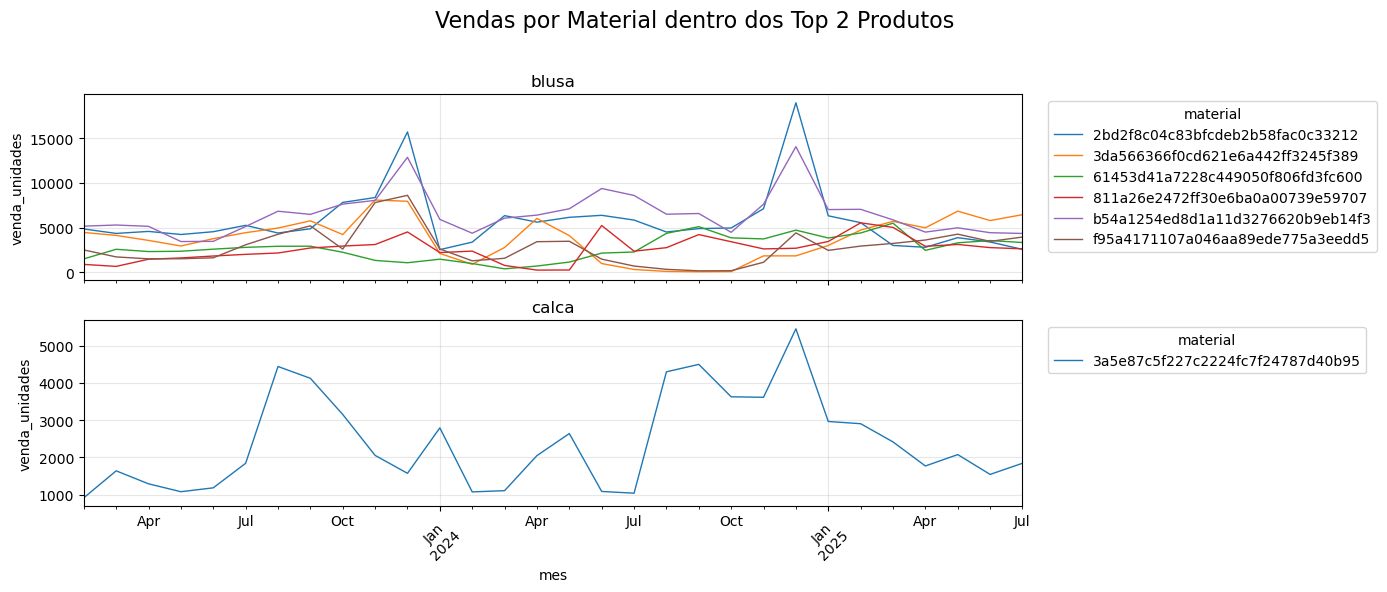

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [131]:
df = remove_materials_no_sales(df)
plot_products_materials(df, n_products=2, title='Vendas por Material dentro dos Top 2 Produtos')

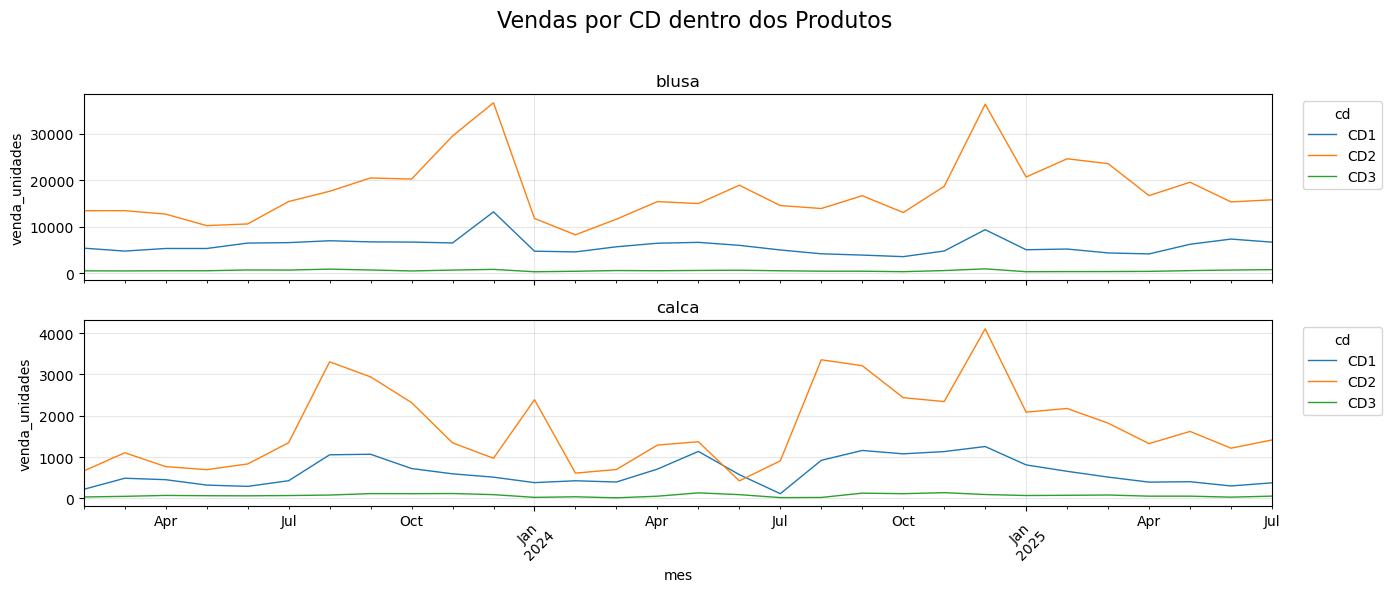

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [132]:
plot_produtos_in_cds(df, n_products=2, title='Vendas por CD dentro dos Produtos')

In [133]:
df['clima_loja'].isnull().sum()

np.int64(0)

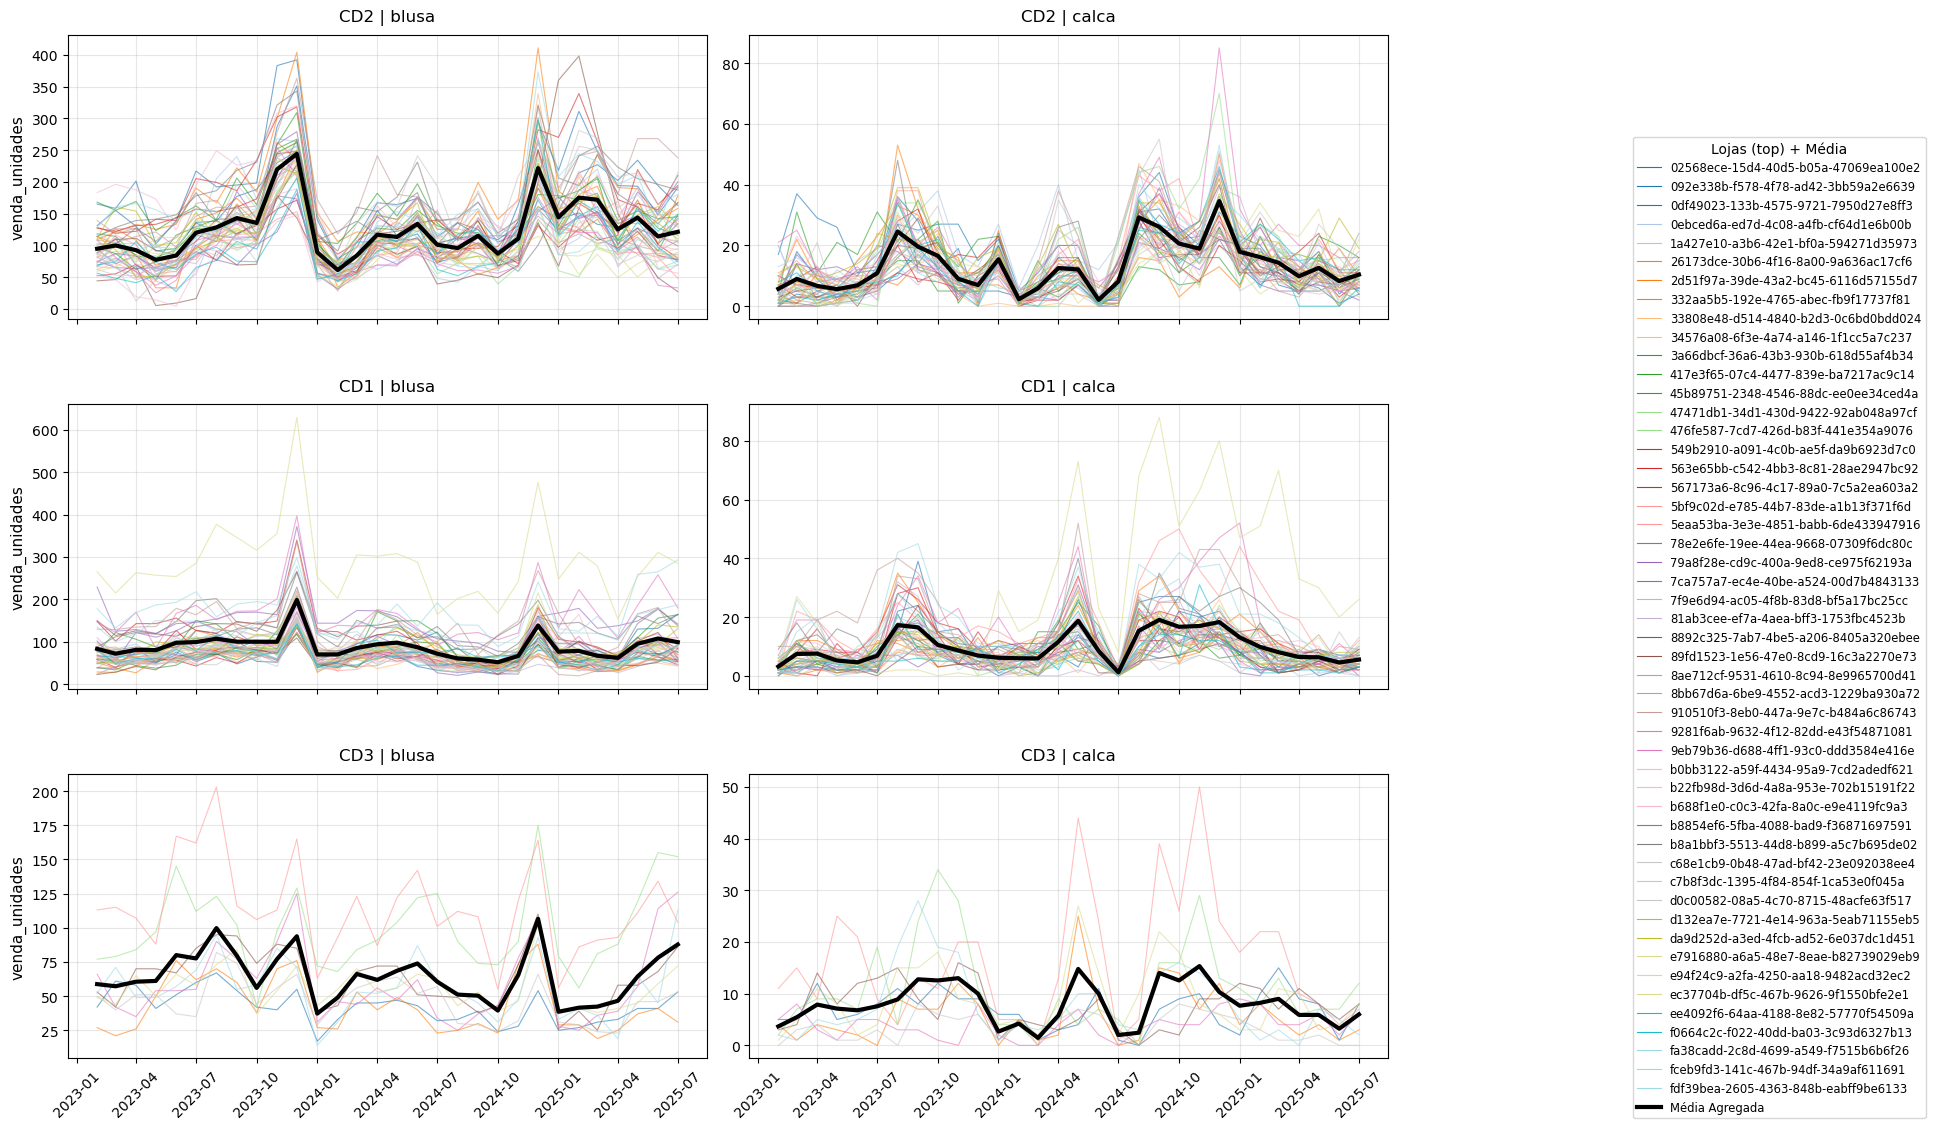

(<Figure size 1600x1140 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2 | calca'}>],
        [<Axes: title={'center': 'CD1 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1 | calca'}>],
        [<Axes: title={'center': 'CD3 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3 | calca'}>]], dtype=object))

In [134]:
plot_time_series_cds_products_by_stores(df, n_rows=3, n_cols=2, top_stores=50, show_legend=True)

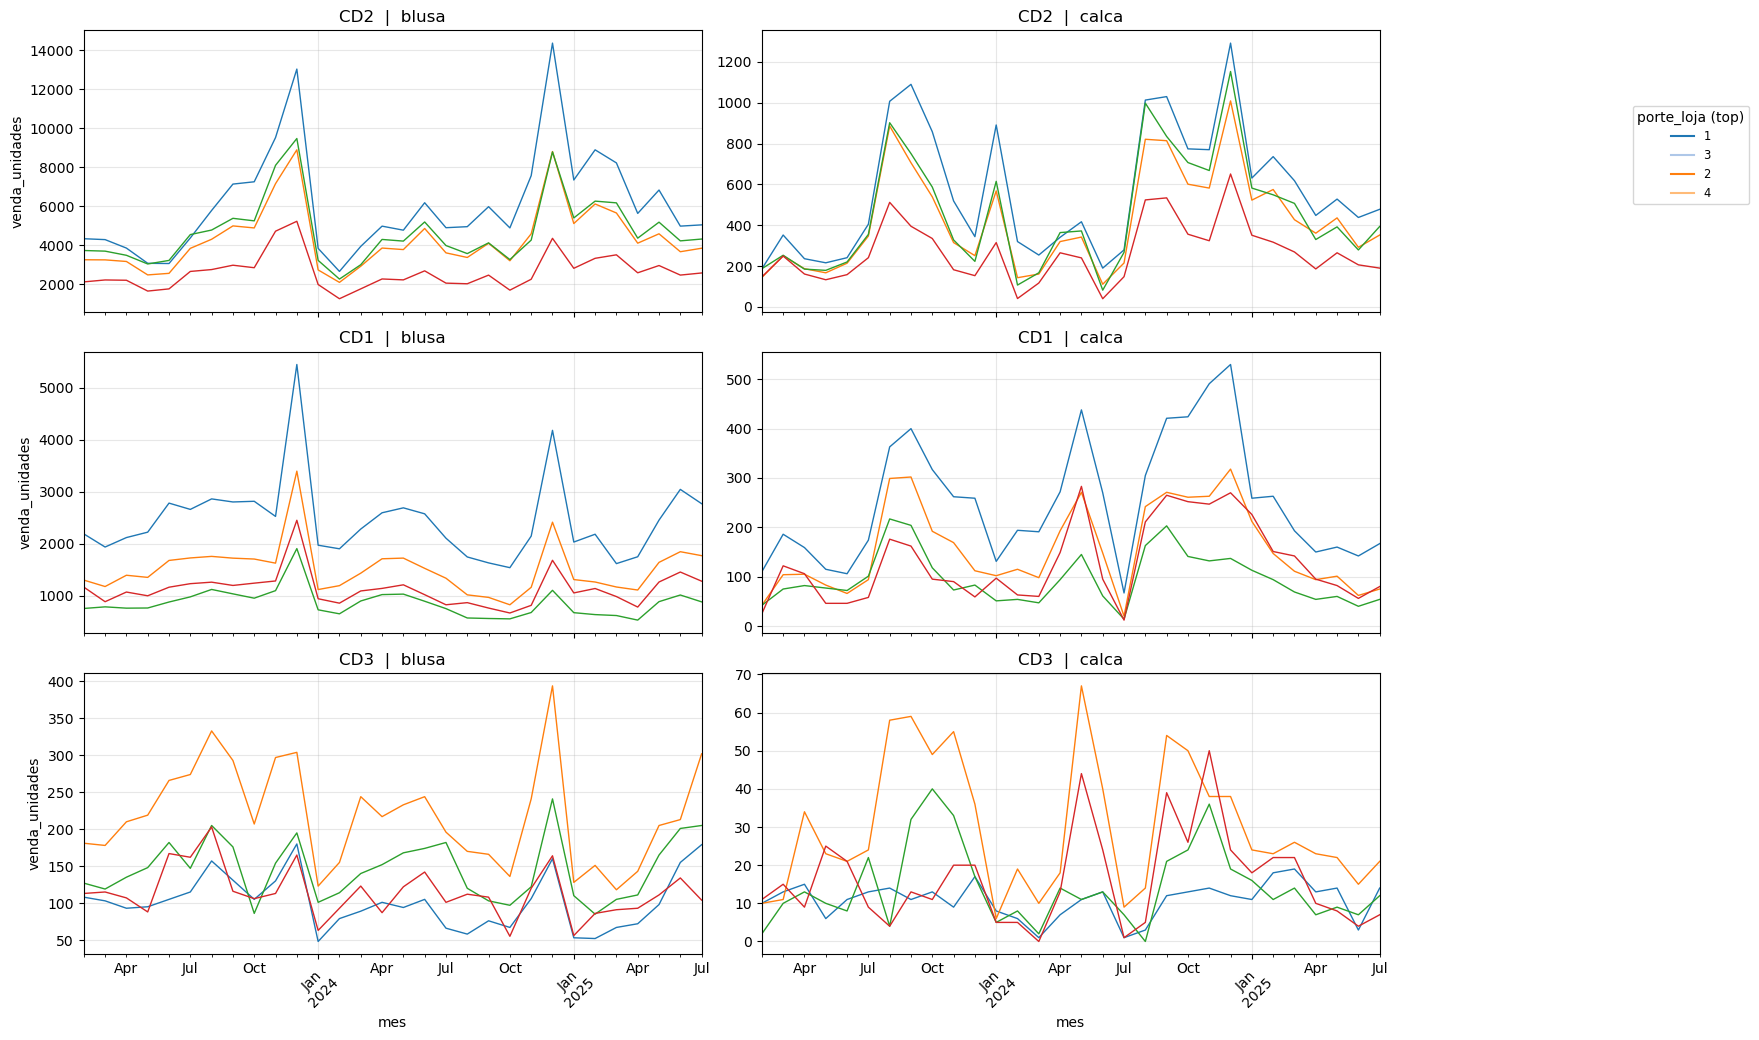

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [135]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_size(df, n_rows=3, n_cols=2, top_stores=20)


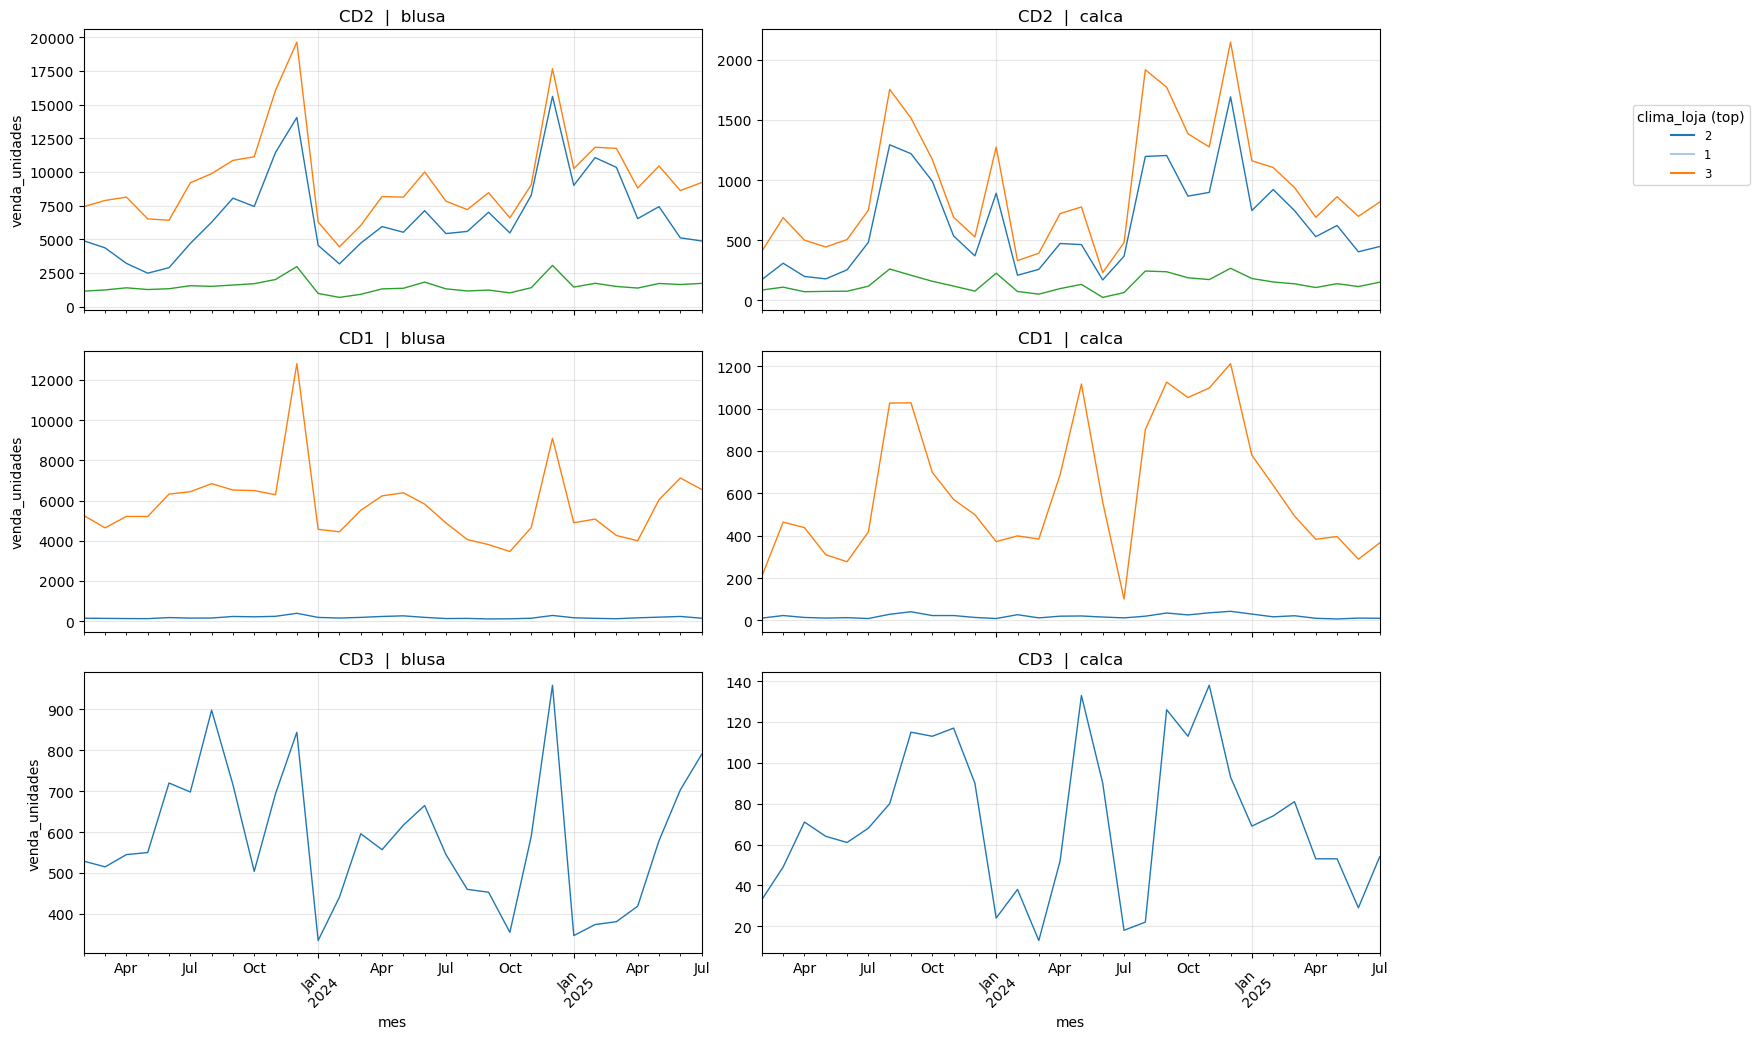

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [136]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_weather(df, n_rows=3, n_cols=2, top_stores=20)

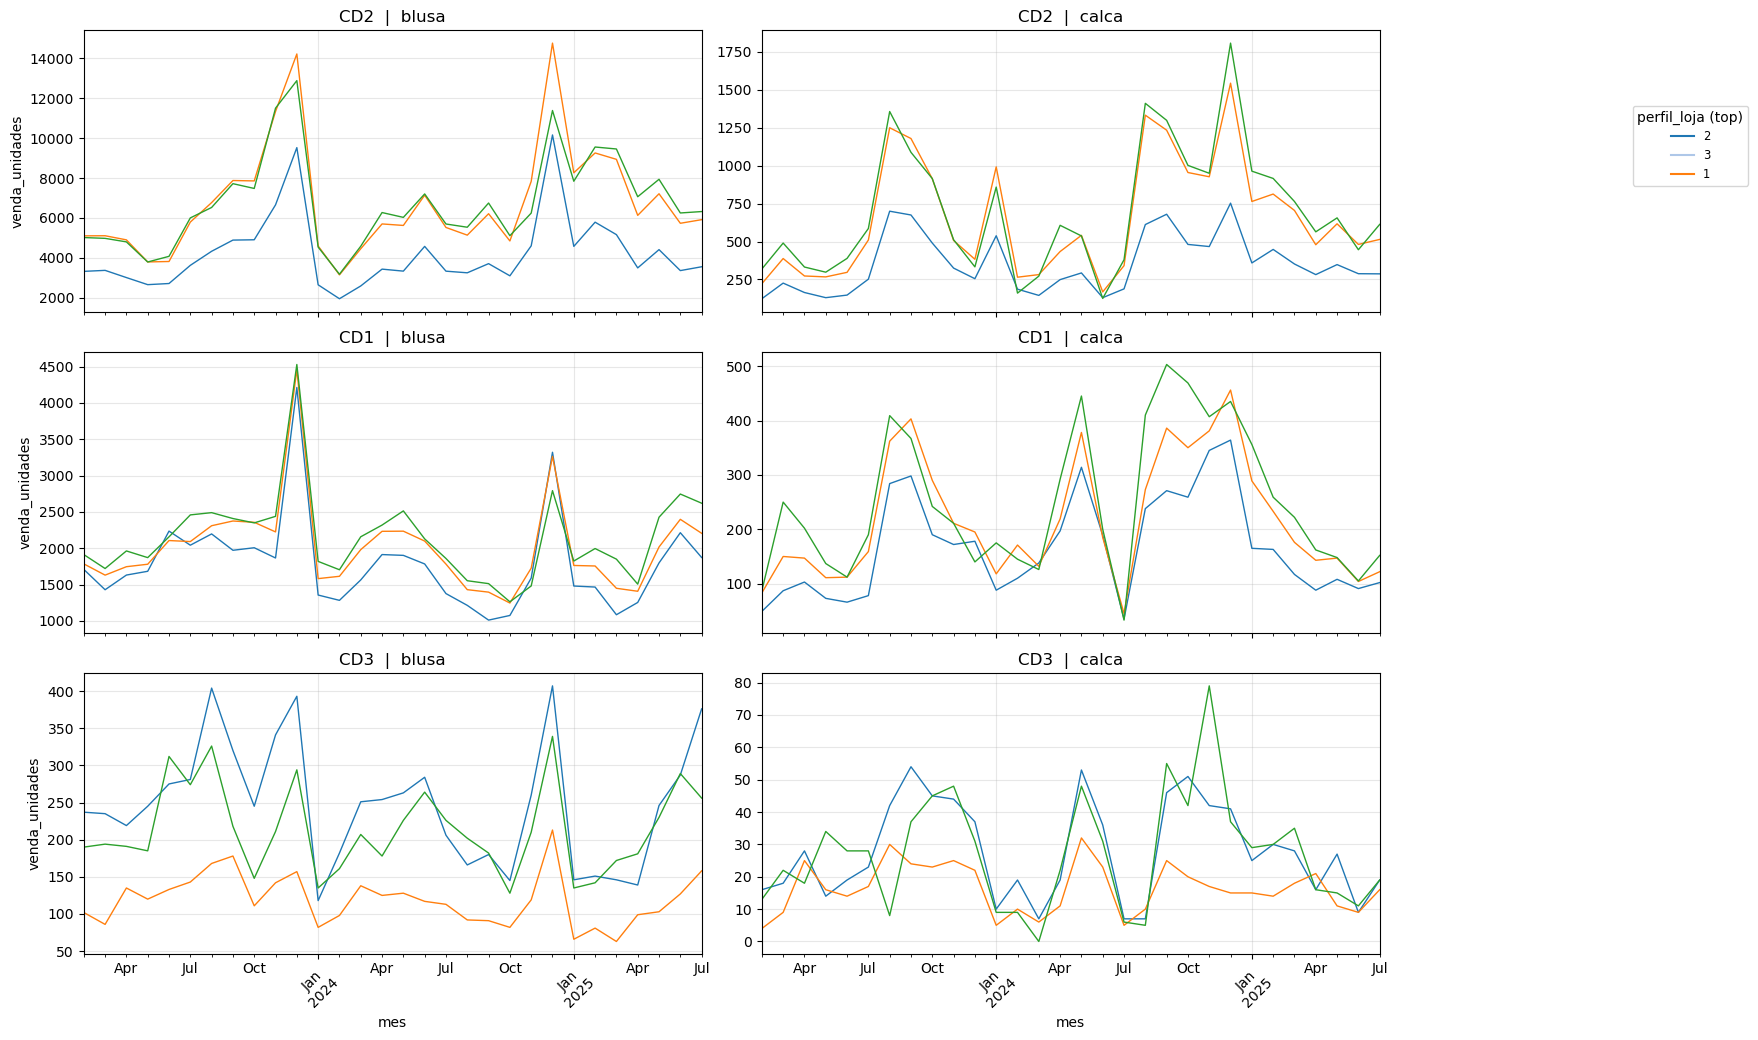

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [137]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_profile(df, n_rows=3, n_cols=2, top_stores=20)

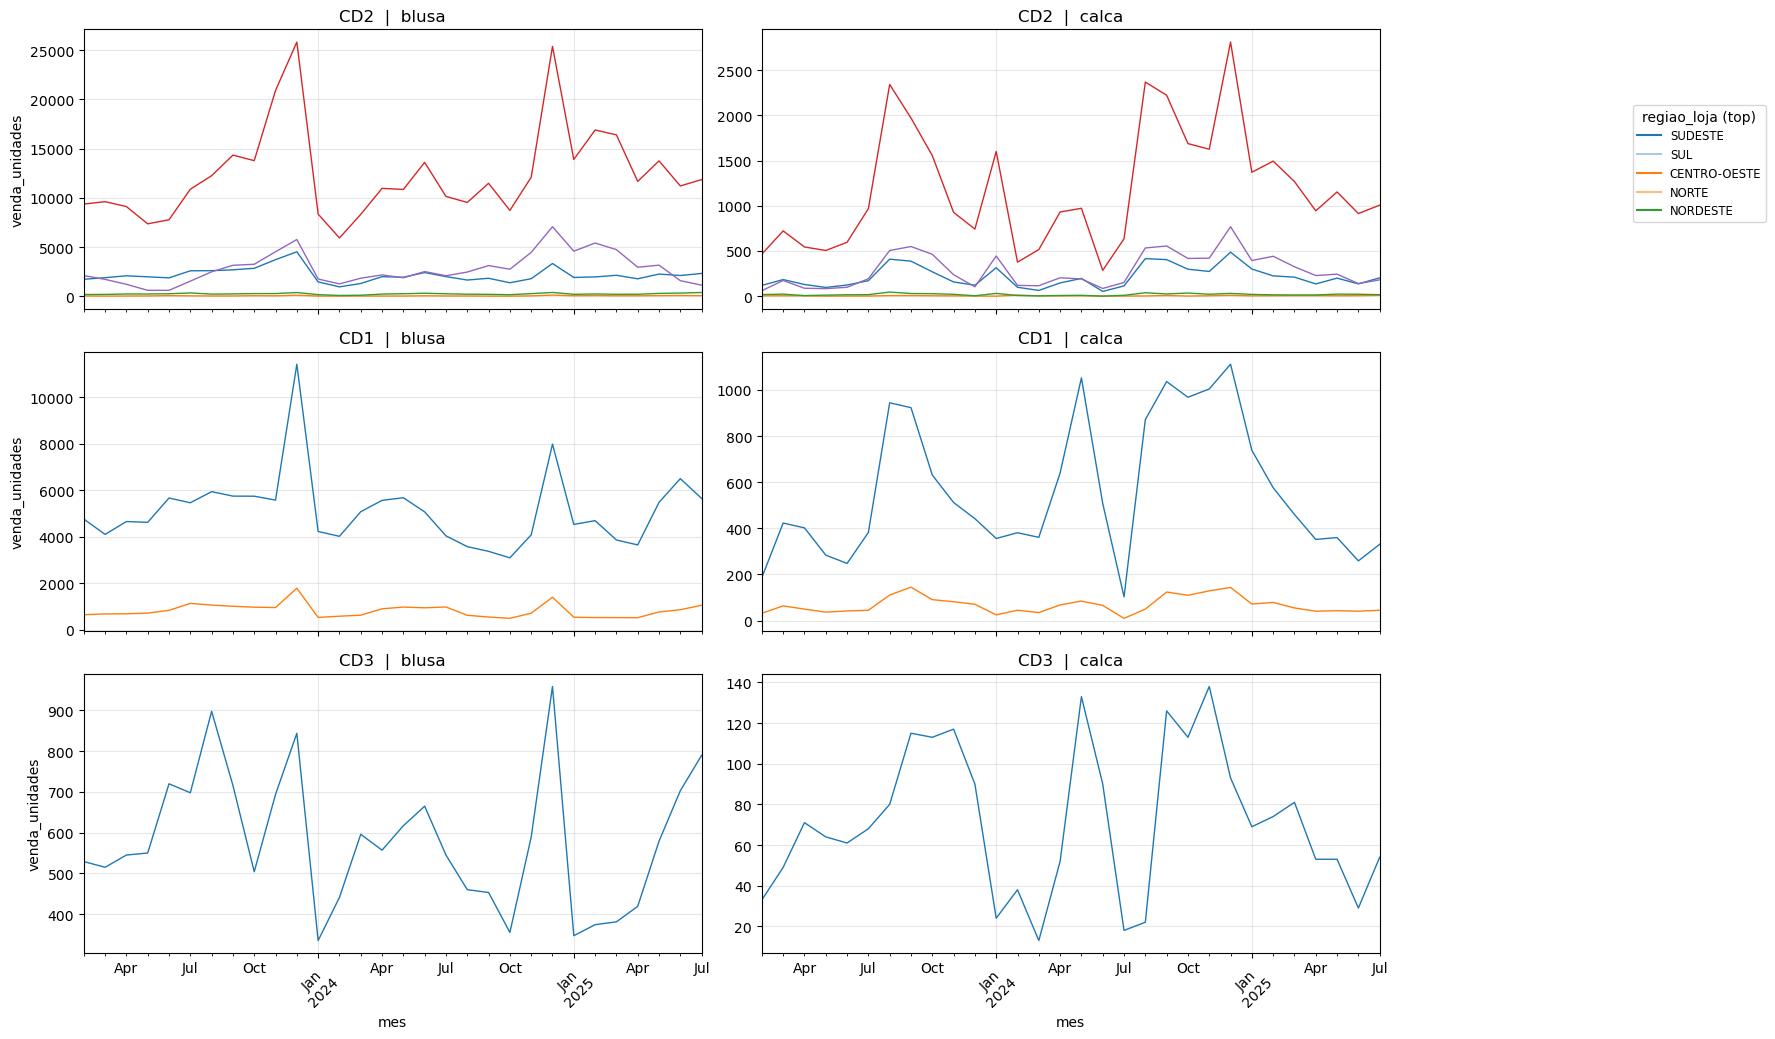

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [138]:
plot_time_series_cds_products_store_region(df, n_rows=3, n_cols=2, top_stores=20)

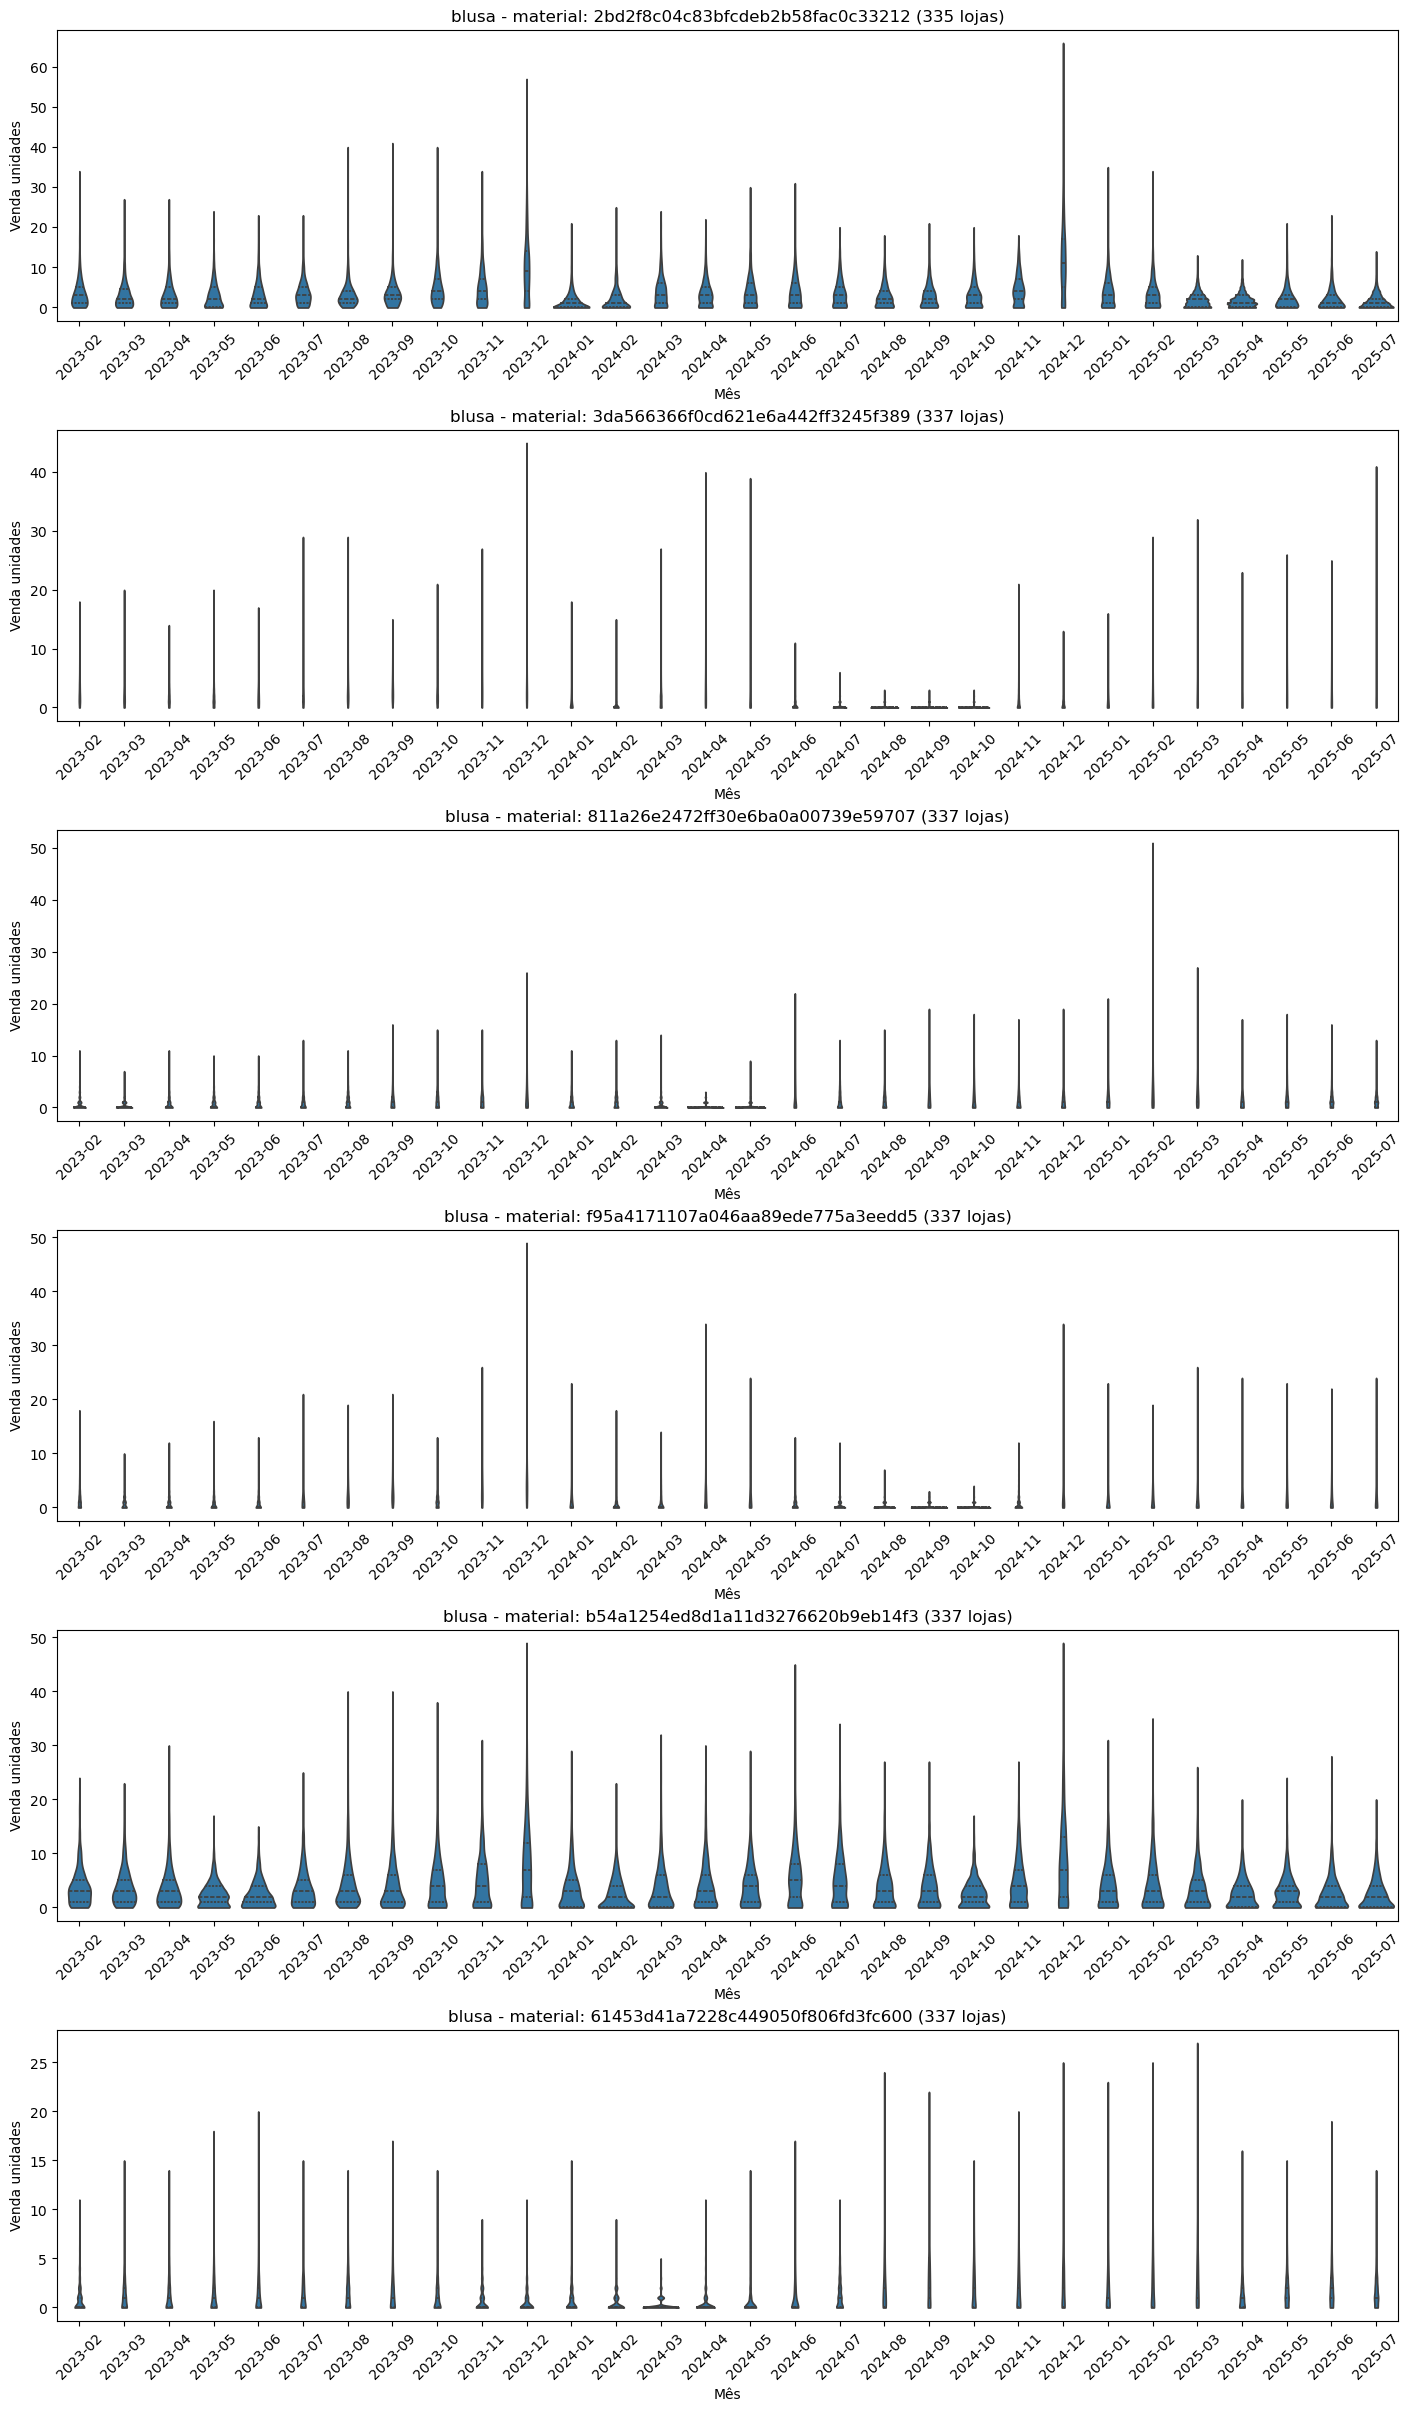

In [139]:
violin_plot_material_store_sales(df, 'blusa', materials=None)

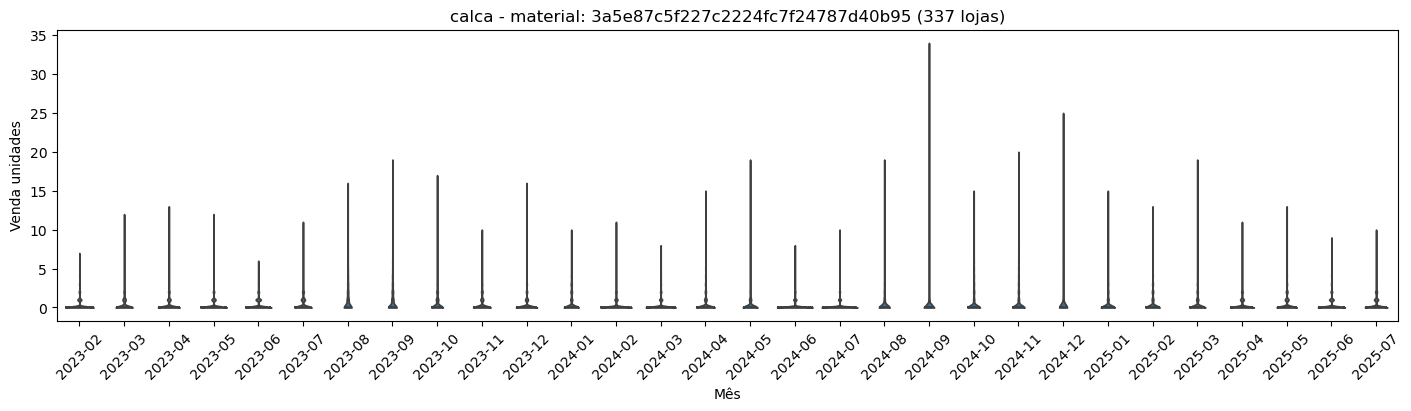

In [26]:
violin_plot_material_store_sales(df, 'calca', materials=None)

#### Outlier detection - Hierachical TIme Series

In [140]:
df = remove_time_series_min_length(df, min_length=24)

In [141]:
spec = [
        ['total'],
        ['total','centro_distribuicao'],
        ['total','centro_distribuicao','regiao_loja'],
        ['total','centro_distribuicao','regiao_loja','clima_loja'],
        ['total','centro_distribuicao','regiao_loja','clima_loja','loja'],
        ['total','centro_distribuicao','regiao_loja','clima_loja','loja','produto'],
        ['total','centro_distribuicao','regiao_loja','clima_loja','loja','produto','material'],
        ['total','centro_distribuicao','regiao_loja','clima_loja','loja','produto','material','sku']
]

y_hier, S, tags = hierarchical_aggregation(df, spec, columns = ['centro_distribuicao','regiao_loja','clima_loja','loja','produto','material','sku','mes','venda_unidades'], ds='mes', y='venda_unidades')

Níveis criados:
total: 1 séries
total/centro_distribuicao: 3 séries
total/centro_distribuicao/regiao_loja: 8 séries
total/centro_distribuicao/regiao_loja/clima_loja: 13 séries
total/centro_distribuicao/regiao_loja/clima_loja/loja: 332 séries
total/centro_distribuicao/regiao_loja/clima_loja/loja/produto: 664 séries
total/centro_distribuicao/regiao_loja/clima_loja/loja/produto/material: 2324 séries
total/centro_distribuicao/regiao_loja/clima_loja/loja/produto/material/sku: 11264 séries


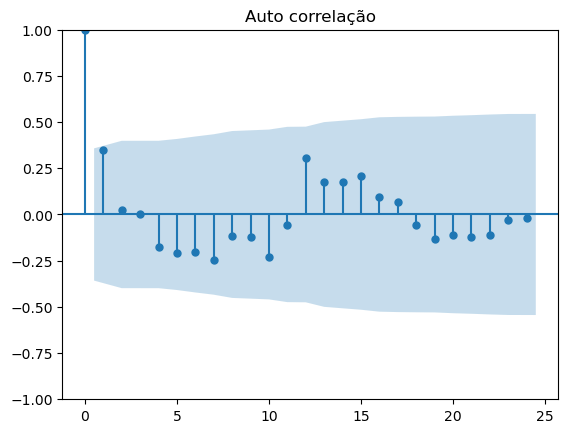

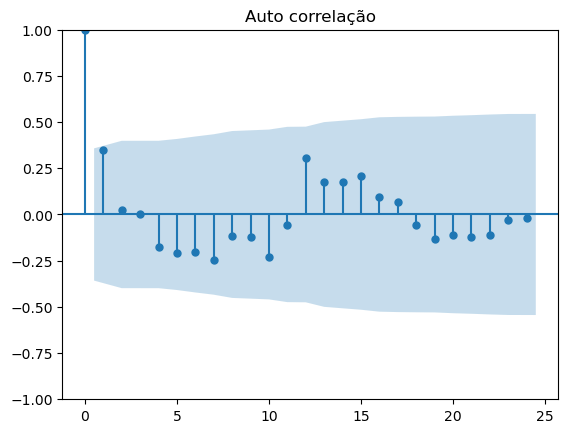

In [142]:
#Analise de auto correlação da série total
plot_acf(y_hier[y_hier['unique_id'] == 'total'].iloc[:,2], lags=24, alpha=0.05, title=f'Auto correlação')

The auto correlation plot indicate ac for lags 6 and 12. 6 is the collection period and 12 is anual seasonality.

<Axes: xlabel='ds'>

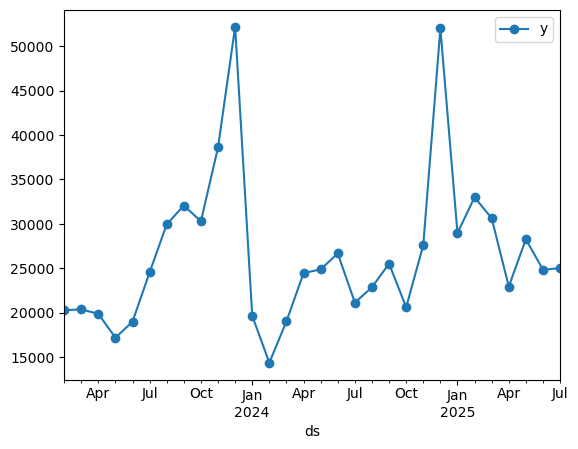

In [143]:
y_hier[y_hier['unique_id'] == 'total'].plot(x='ds', y='y',marker='o')

In [144]:
sf = StatsForecast(models=[MSTL(season_length=[6,12], stl_kwargs={"robust": True})], freq="M")
sf.fit(y_hier)
dcmp = sf.fitted_[0, 0].model_

In [145]:
# Calcula IQR nos resíduos (remainder)
remainder = dcmp['remainder'].dropna()
q1 = remainder.quantile(0.25)
q3 = remainder.quantile(0.75)
iqr = q3 - q1

In [146]:
outliers_mask = (dcmp['remainder'] < (q1 - 3 * iqr)) | (dcmp['remainder'] > (q3 + 3 * iqr))
outliers = dcmp.loc[outliers_mask]  # Isso retorna as linhas com outliers

In [147]:
outliers

Empty DataFrame
Columns: [data, trend, seasonal6, seasonal12, remainder]
Index: []

In [148]:
print(f"Outliers detectados: {len(outliers)}")  # Pra debug}

Outliers detectados: 0


<Axes: >

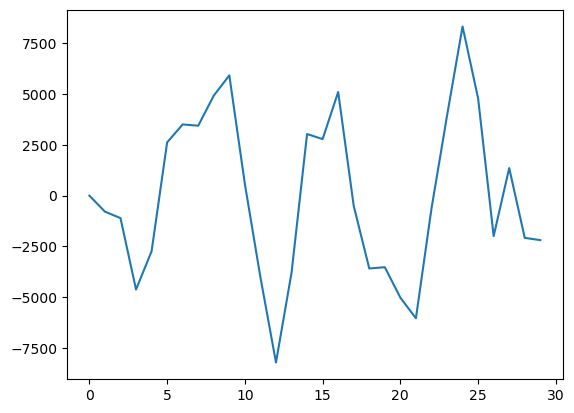

In [149]:
dcmp['remainder'].plot()

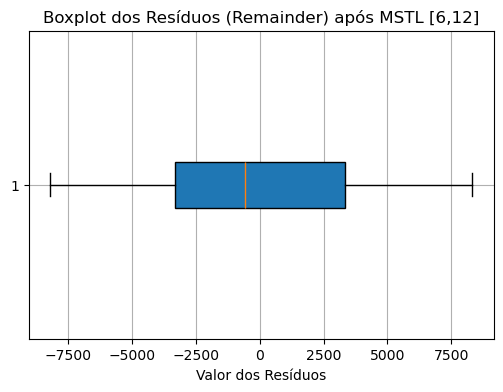

In [150]:
from matplotlib import pyplot as plt
# Assume dcmp pronto
remainder = dcmp['remainder']

plt.figure(figsize=(6, 4))
plt.boxplot(remainder, vert=False, patch_artist=True)
plt.title('Boxplot dos Resíduos (Remainder) após MSTL [6,12]')
plt.xlabel('Valor dos Resíduos')
plt.grid(True)
plt.show()

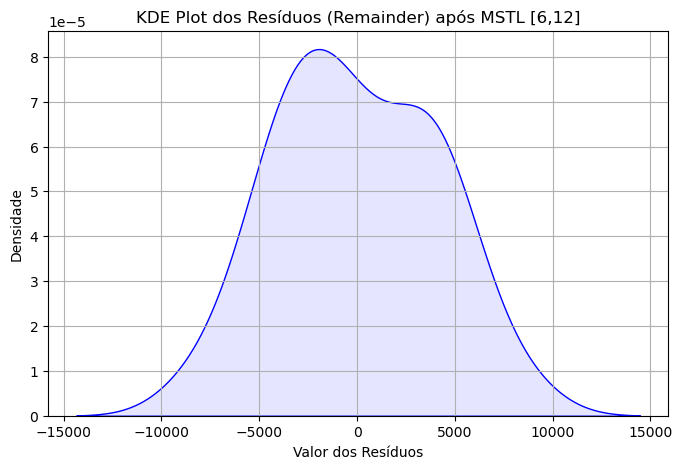

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume dcmp pronto
remainder = dcmp['remainder']

plt.figure(figsize=(8, 5))
sns.kdeplot(remainder, fill=True, color='blue', alpha=0.1)
plt.title('KDE Plot dos Resíduos (Remainder) após MSTL [6,12]')
plt.xlabel('Valor dos Resíduos')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

Dropar as times series de x blusa e camiseta

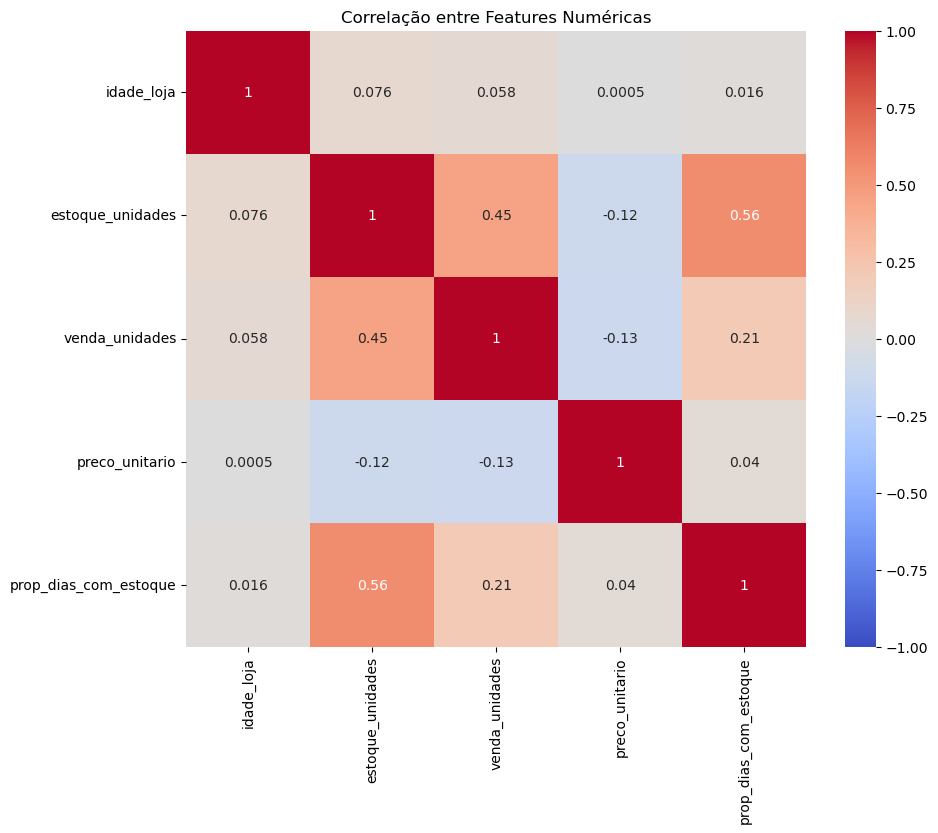

In [154]:
num_cols = ['idade_loja', 'estoque_unidades', 'venda_unidades', 'preco_unitario', 'prop_dias_com_estoque']
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Features Numéricas')
plt.show()